### Team ID : 5C15  Sem : 5th Div : C School : computer science        

In [0]:
import warnings
warnings.filterwarnings('ignore')

### Topic ID : 5ADMACP04  
## Project title : Warm up: Predict blood donation

###  crisp problem statement : To predict whether or not a donor will give blood the next time the vehicle comes to campus.

####  Team leader : V Vineeth kumar
#### Members roll no : 190, 211, 184
#### USN : 01FE16BCS176
####       01FE16BCS250
####       01FE16BCS167
#### Name : Sammed chougale
####       Rohit V
####        V Vineeth kumar


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [0]:
mytestdata=pd.read_csv("test.csv")
data=pd.read_csv("data.csv")

In [0]:
mytraindata=pd.read_csv("data.csv")

In [0]:
mytestdata.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


### NOTE 1:after looking at the head of the tuples of the data we know that the first coloumn is just an id and does not afftect my learning model


In [0]:
print("We have", mytraindata.shape[0], "entries in the training set and", 
      mytestdata.shape[0], "in the test set.")
print("In total we have", mytraindata.shape[0]-1 + mytestdata.shape[0]-1, "entries.")

We have 748 entries in the training set and 200 in the test set.
In total we have 946 entries.


### * we delete the coloumn 1 (id) which doesnt play any role in prediction

In [0]:
# Merge train and test users
#data = pd.concat((mytraindata, mytestdata), axis = 0, ignore_index = True, sort = False)
df=data
data.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Analysis 1 :
 Here we can see that the training dataset is 576 rows with 6 columns and the test set is 200 rows with 5 columns. First thing to note is that it’s generally best to have a training set bigger than the test set. 3 times bigger is not too bad. The data is all numeric which is great! Easy to deal with! Each row is an individual.
    

In [0]:
data.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


 
 we can see that “Months since last donation” ranges from 0 to 74, with a mean of 9.439. With such a low mean in comparison to the max range, this maximum may be an anomaly and will become clearer, as will other findings, further into our analysis.
 
 We have a similar case with the “Number of Donations” column with a mean of 5.427 and a range between 1 and 50. 
 


In [0]:
data.pivot_table(index=data.columns[-1], values=data.columns[:-1],aggfunc=np.mean)

,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.)
Made Donation in March 2007,,,,
0,34.770175,10.771930,4.801754,1200.438596
1,32.719101,5.455056,7.797753,1949.438202


create a pivot table to see the means relating to those who donated blood and those who didn’t.. 

The pivot shows that on average, people that donated tend to have donated had fewer months since their last donation than those who did not donate. 

The pivot also shows that on average, those who donated in march 2007 gave more donations in total than those who did not. 

The total volume donated follows the same trend as the number of donations. Let’s explore that concept a bit more; how much each of these variable move together.

In [0]:
data.iloc[:,0:].corr()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
Months since Last Donation,1.000000,-0.182745,-0.182745,0.160618,-0.279869
Number of Donations,-0.182745,1.000000,1.000000,0.634940,0.218633
Total Volume Donated (c.c.),-0.182745,1.000000,1.000000,0.634940,0.218633
Months since First Donation,0.160618,0.634940,0.634940,1.000000,-0.035854
Made Donation in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


This correlation table and diagram show the relationship between the movement of two variables. Straight away, it’s noticeable that


There is a perfect correlation between the “Total Volume Donated (c.c.)” column and the “Number of Donations” column.

The next highest correlation is between “Months since First Donation” and the “Number of Donations” which is 0.622116. This means that as the number of months since the first donation increases, so does the number of donations

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 20)

In [0]:
finaltest=test
finaltrain=train

In [0]:
X_train=data
y_train= data[['Made Donation in March 2007']]

/home/vvk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vvk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vvk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/vvk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'densit

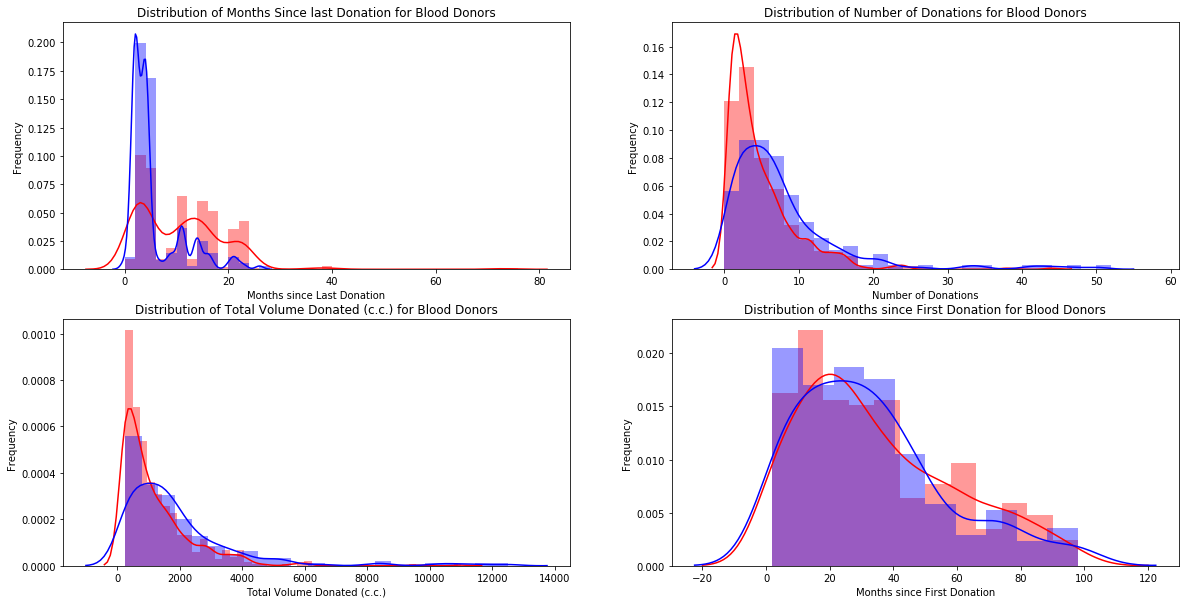

In [0]:
plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
sns.distplot(X_train[y_train.values == 0]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.subplot(2, 2, 2)
sns.distplot(X_train[y_train.values == 0]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Blood Donors')

plt.subplot(2, 2, 3)
sns.distplot(X_train[y_train.values == 0]['Total Volume Donated (c.c.)'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Total Volume Donated (c.c.)'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Blood Donors')

plt.subplot(2, 2, 4)
sns.distplot(X_train[y_train.values == 0]['Months since First Donation'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since First Donation'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Blood Donors')

plt.show()

## Red indicates did not donate and blue donated

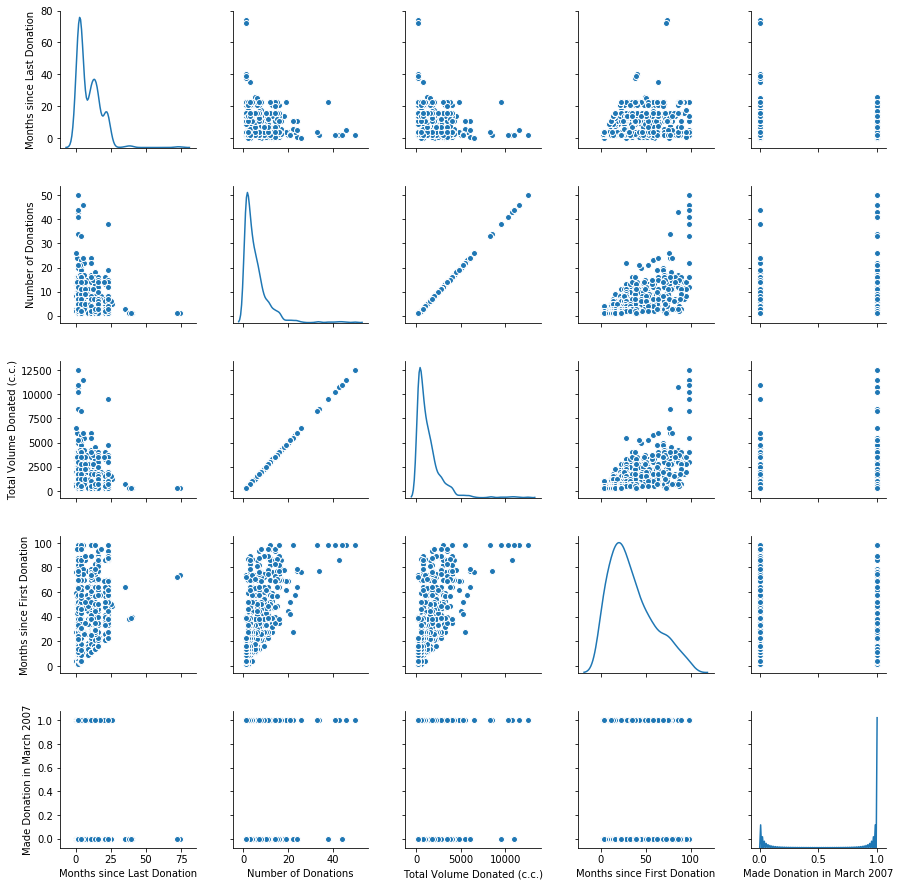

In [0]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [0]:
train_data=train
test_data=test

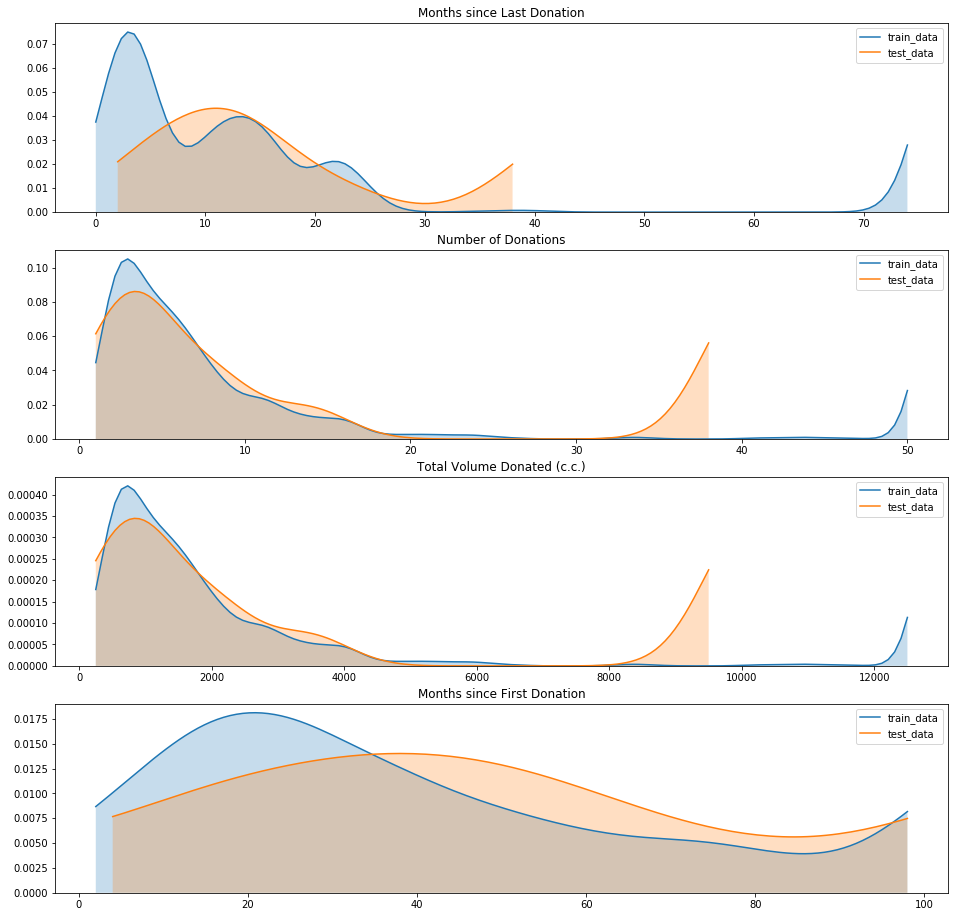

In [0]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('Months since Last Donation')
sns.kdeplot(train_data['Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('Number of Donations')
sns.kdeplot(train_data['Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('Total Volume Donated (c.c.)')
sns.kdeplot(train_data['Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('Months since First Donation')
sns.kdeplot(train_data['Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

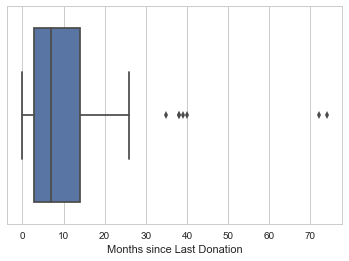

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = data
ax = sns.boxplot(x=tips["Months since Last Donation"])


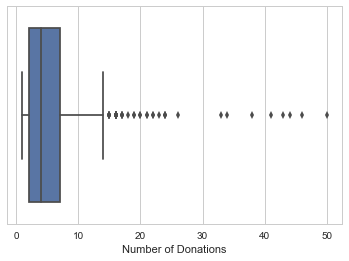

In [0]:
ax=sns.boxplot(x=tips["Number of Donations"])


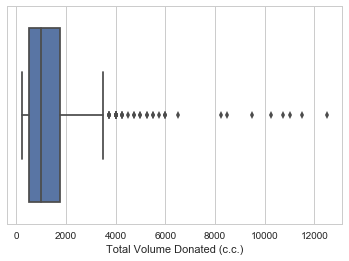

In [0]:
ax = sns.boxplot(x=tips["Total Volume Donated (c.c.)"])


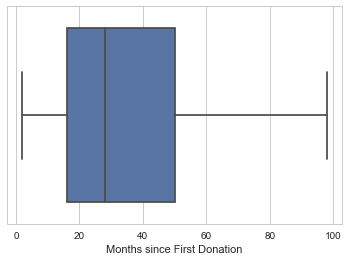

In [0]:
ax = sns.boxplot(x=tips["Months since First Donation"])

### Pre processing stage

### 1) we eliminate the " id "

### The log transformation, a widely used method to address skewed data as we can see that the our data is skewed applying log reduces the skeweness of the data

In [0]:
train_data['log Months since Last Donation'] = train_data['Months since Last Donation'].apply(lambda x: np.log(x+1))
test_data['log Months since Last Donation'] = test_data['Months since Last Donation'].apply(lambda x: np.log(x+1))
mytestdata['log Months since Last Donation'] = mytestdata['Months since Last Donation'].apply(lambda x: np.log(x+1))

train_data['log Number of Donations'] = train_data['Number of Donations'].apply(lambda x: np.log(x))
test_data['log Number of Donations'] = test_data['Number of Donations'].apply(lambda x: np.log(x))
mytestdata['log Number of Donations'] = mytestdata['Number of Donations'].apply(lambda x: np.log(x))

train_data['log Total Volume Donated (c.c.)'] = train_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))
test_data['log Total Volume Donated (c.c.)'] = test_data['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))
mytestdata['log Total Volume Donated (c.c.)'] = mytestdata['Total Volume Donated (c.c.)'].apply(lambda x: np.log(x))

train_data['log Months since First Donation'] = train_data['Months since First Donation'].apply(lambda x: np.log(x))
test_data['log Months since First Donation'] = test_data['Months since First Donation'].apply(lambda x: np.log(x))
mytestdata['log Months since First Donation'] = mytestdata['Months since First Donation'].apply(lambda x: np.log(x))

In [0]:
train_data.median()

Months since Last Donation            7.000000
Number of Donations                   4.000000
Total Volume Donated (c.c.)        1000.000000
Months since First Donation          28.000000
Made Donation in March 2007           0.000000
log Months since Last Donation        2.079442
log Number of Donations               1.386294
log Total Volume Donated (c.c.)       6.907755
log Months since First Donation       3.332205
dtype: float64

In [0]:
train_data.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,9.457418,5.480769,1370.192308,34.075549,0.243132,2.052635,1.287904,6.809365,3.173133
std,8.074164,5.759715,1439.928822,24.357178,0.429269,0.790464,0.913599,0.913599,0.980485
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000,0.000000,5.521461,0.693147
25%,2.000000,2.000000,500.000000,16.000000,0.000000,1.098612,0.693147,6.214608,2.772589
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,2.079442,1.386294,6.907755,3.332205
75%,14.000000,7.000000,1750.000000,49.000000,0.000000,2.708050,1.945910,7.467371,3.891820
max,74.000000,50.000000,12500.000000,98.000000,1.000000,4.317488,3.912023,9.433484,4.584967


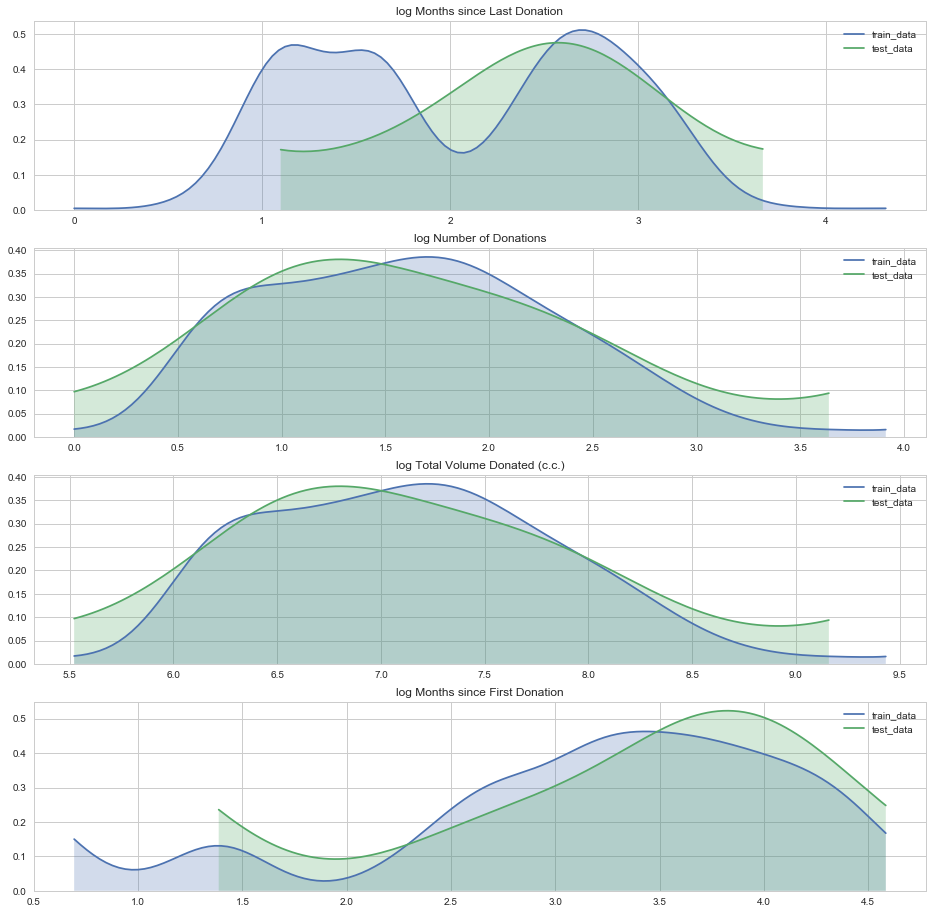

In [0]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('log Months since Last Donation')
sns.kdeplot(train_data['log Months since Last Donation'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['log Months since Last Donation'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('log Number of Donations')
sns.kdeplot(train_data['log Number of Donations'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['log Number of Donations'], shade=True, cut=0, label='test_data',ax=ax2)
 
ax3.set_title('log Total Volume Donated (c.c.)')
sns.kdeplot(train_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['log Total Volume Donated (c.c.)'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('log Months since First Donation')
sns.kdeplot(train_data['log Months since First Donation'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['log Months since First Donation'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

# Review 3

## Attribute Total volume donated is dropped after looking into the coorelation table and inputs from the cohort team 

### We tried to introduce new features from the inputs of review 2

<h4>1) Ratio='Months since First Donation'/'Months since Last Donation'</h4>
<h4>2) Ratio1 ='Months since First Donation'/'Number of Donations'</h4>
<h4>3) Ratio2 ='Months since Last Donation'/'Number of Donations'
<h4>4) Average Donation per Month= 'Total Volume Donated (c.c.)'/'Months since First Donation'</h4>
<h4>5) Frequent Donor='Number of Donations' >= 5 </h4>

In [0]:
train_data=finaltrain
train_data.head()
mytestdata.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation
0,659,2,12,3000,52,1.098612,2.484907,8.006368,3.951244
1,276,21,7,1750,38,3.091042,1.945910,7.467371,3.637586
2,263,4,1,250,4,1.609438,0.000000,5.521461,1.386294
3,303,11,11,2750,38,2.484907,2.397895,7.919356,3.637586
4,83,4,12,3000,34,1.609438,2.484907,8.006368,3.526361


In [0]:
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation
250,11,2,500,11,0,2.484907,0.693147,6.214608,2.397895
339,9,3,750,34,0,2.302585,1.098612,6.620073,3.526361
405,14,3,750,41,0,2.708050,1.098612,6.620073,3.713572
660,15,5,1250,33,0,2.772589,1.609438,7.130899,3.496508
239,8,9,2250,58,0,2.197225,2.197225,7.718685,4.060443


In [0]:
test_data=finaltest
test_data.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation
250,11,2,500,11,0,2.484907,0.693147,6.214608,2.397895
339,9,3,750,34,0,2.302585,1.098612,6.620073,3.526361
405,14,3,750,41,0,2.708050,1.098612,6.620073,3.713572
660,15,5,1250,33,0,2.772589,1.609438,7.130899,3.496508
239,8,9,2250,58,0,2.197225,2.197225,7.718685,4.060443


In [0]:
    train_data['Ratio'] = train_data['Months since Last Donation']/train_data['Months since First Donation']
    train_data['Ratio'].head()
    test_data['Ratio'] = test_data['Months since Last Donation']/test_data['Months since First Donation']
    test_data['Ratio'].head()
    mytestdata['Ratio'] = mytestdata['Months since Last Donation']/mytestdata['Months since First Donation']
    mytestdata['Ratio'].head()    
    
    ##eliminated as it is reducing the accuracy

0    0.038462
1    0.552632
2    1.000000
3    0.289474
4    0.117647
Name: Ratio, dtype: float64

In [0]:
    train_data['Ratio1'] = train_data['Months since First Donation']/train_data['Number of Donations']
    train_data['Ratio1'].head()
    test_data['Ratio1'] = test_data['Months since First Donation']/test_data['Number of Donations']
    test_data['Ratio1'].head() 

    mytestdata['Ratio1'] = mytestdata['Months since First Donation']/mytestdata['Number of Donations']
    mytestdata['Ratio1'].head() 

0    4.333333
1    5.428571
2    4.000000
3    3.454545
4    2.833333
Name: Ratio1, dtype: float64

In [0]:
train_data['fidelity']=train_data['Months since Last Donation']/train_data['Number of Donations']
train_data['fidelity'].head()
test_data['fidelity']=test_data['Months since Last Donation']/test_data['Number of Donations']
test_data['fidelity'].head()

mytestdata['fidelity']=mytestdata['Months since Last Donation']/mytestdata['Number of Donations']
mytestdata['fidelity'].head()

0    0.166667
1    3.000000
2    4.000000
3    1.000000
4    0.333333
Name: fidelity, dtype: float64

In [0]:
train_data['Average Donation per Month'] = train_data['Total Volume Donated (c.c.)']/train_data['Months since First Donation']
train_data['Average Donation per Month'] .head()
test_data['Average Donation per Month'] = test_data['Total Volume Donated (c.c.)']/test_data['Months since First Donation']
test_data['Average Donation per Month'] .head()

mytestdata['Average Donation per Month'] = mytestdata['Total Volume Donated (c.c.)']/mytestdata['Months since First Donation']
mytestdata['Average Donation per Month'] .head()


0    57.692308
1    46.052632
2    62.500000
3    72.368421
4    88.235294
Name: Average Donation per Month, dtype: float64

In [0]:
train_data['Frequent Donor'] = (train_data['Number of Donations'] >= 5)
train_data['Frequent Donor'].head()
test_data['Frequent Donor'] = (test_data['Number of Donations'] >= 5)
test_data['Frequent Donor'].head()

mytestdata['Frequent Donor'] = (mytestdata['Number of Donations'] >= 5)
mytestdata['Frequent Donor'].head()

0     True
1     True
2    False
3     True
4     True
Name: Frequent Donor, dtype: bool

In [0]:
train_data['Frequent Donorbl']=train_data['Frequent Donor'].astype(int)
train_data['Frequent Donorbl'].head()
test_data['Frequent Donorbl']=test_data['Frequent Donor'].astype(int)
test_data['Frequent Donorbl'].head()

mytestdata['Frequent Donorbl']=mytestdata['Frequent Donor'].astype(int)
mytestdata['Frequent Donorbl'].head()

0    1
1    1
2    0
3    1
4    1
Name: Frequent Donorbl, dtype: int64

In [0]:
mytestdata.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Ratio,Ratio1,fidelity,Average Donation per Month,Frequent Donorbl
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000,2.084909,1.320975,6.842436,3.210691,0.452653,8.608012,4.273405,47.489776,0.435000
std,211.138231,7.61907,6.125224,1531.305955,25.111197,0.748541,0.974964,0.974964,0.982449,0.376200,7.144601,6.284327,31.549327,0.497001
min,1.000000,0.00000,1.000000,250.000000,2.000000,0.000000,0.000000,5.521461,0.693147,0.000000,1.777778,0.000000,5.747126,0.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000,1.609438,0.693147,6.214608,2.639057,0.117081,4.000000,0.666667,22.727273,0.000000
50%,377.500000,7.00000,4.000000,1000.000000,31.000000,2.079442,1.386294,6.907755,3.433987,0.321765,6.142857,2.000000,40.697674,0.000000
75%,537.000000,14.00000,8.000000,2000.000000,52.000000,2.708050,2.079442,7.600902,3.951244,1.000000,11.000000,4.666667,62.500000,1.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000,3.713572,3.713572,9.235033,4.584967,1.000000,43.500000,40.000000,140.625000,1.000000


In [0]:

mytestdata

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Ratio,Ratio1,fidelity,Average Donation per Month,Frequent Donor,Frequent Donorbl
0,659,2,12,3000,52,1.098612,2.484907,8.006368,3.951244,0.038462,4.333333,0.166667,57.692308,True,1
1,276,21,7,1750,38,3.091042,1.945910,7.467371,3.637586,0.552632,5.428571,3.000000,46.052632,True,1
2,263,4,1,250,4,1.609438,0.000000,5.521461,1.386294,1.000000,4.000000,4.000000,62.500000,False,0
3,303,11,11,2750,38,2.484907,2.397895,7.919356,3.637586,0.289474,3.454545,1.000000,72.368421,True,1
4,83,4,12,3000,34,1.609438,2.484907,8.006368,3.526361,0.117647,2.833333,0.333333,88.235294,True,1
5,500,3,21,5250,42,1.386294,3.044522,8.565983,3.737670,0.071429,2.000000,0.142857,125.000000,True,1
6,530,4,2,500,4,1.609438,0.693147,6.214608,1.386294,1.000000,2.000000,2.000000,125.000000,False,0
7,244,14,1,250,14,2.708050,0.000000,5.521461,2.639057,1.000000,14.000000,14.000000,17.857143,False,0
8,249,23,2,500,87,3.178054,0.693147,6.214608,4.465908,0.264368,43.500000,11.500000,5.747126,False,0
9,728,14,4,1000,64,2.708050,1.386294,6.907755,4.158883,0.218750,16.000000,3.500000,15.625000,False,0


In [0]:
clean_train_data=train_data
X_train = clean_train_data[['log Months since Last Donation', 'log Number of Donations',
       'log Months since First Donation','fidelity','Ratio1',
       'Ratio'
                            ]]
Y_train = clean_train_data[['Made Donation in March 2007']]

X_test=finaltest[['log Months since Last Donation', 'log Number of Donations',
       'log Months since First Donation','fidelity','Ratio',
       'Ratio1'
                            ]]
Y_test=finaltest[['Made Donation in March 2007']]

X_pred=mytestdata[['log Months since Last Donation','Frequent Donorbl','Ratio1', 'log Number of Donations','fidelity','log Months since First Donation','Ratio']]

train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Ratio,Ratio1,fidelity,Average Donation per Month,Frequent Donorbl
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,9.489011,5.425824,1356.456044,34.049451,0.239011,2.058125,1.284051,6.805512,3.173808,0.446955,8.689459,4.392756,49.059261,0.438187
std,8.112001,5.685232,1421.308005,24.312563,0.426773,0.784145,0.906292,0.906292,0.978155,0.375251,7.338756,6.950461,37.758894,0.496506
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000,0.000000,5.521461,0.693147,0.000000,1.000000,0.000000,3.378378,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000,1.098612,0.693147,6.214608,2.772589,0.125000,4.000000,0.666667,21.739130,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,2.079442,1.386294,6.907755,3.332205,0.289474,6.585714,2.000000,37.961133,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000,2.708050,1.945910,7.467371,3.896871,1.000000,11.500000,4.666667,62.500000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,4.317488,3.912023,9.433484,4.584967,1.000000,74.000000,74.000000,250.000000,1.000000


### Now the data is ready to be fed to the learning model

In [0]:
 X_train.head()

,log Months since Last Donation,log Number of Donations,log Months since First Donation,fidelity,Ratio1,Ratio
517,1.609438,3.496508,4.584967,0.121212,2.969697,0.040816
269,2.639057,1.386294,3.044522,3.250000,5.250000,0.619048
427,2.708050,1.609438,4.304065,2.800000,14.800000,0.189189
628,1.098612,1.609438,4.143135,0.400000,12.600000,0.031746
107,1.386294,1.609438,3.258097,0.600000,5.200000,0.115385


### Extra: Feature Setection alogorithm

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#import xgboost as xgb
kf_10 = KFold( n_splits = 10, shuffle = True, random_state = 12345)

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 4 (0.217735)
2. feature 5 (0.184007)
3. feature 2 (0.173604)
4. feature 3 (0.157016)
5. feature 0 (0.135228)
6. feature 1 (0.132409)


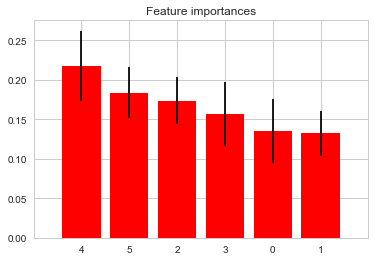

In [0]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=13,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
## Replace this X and Y with your dataset train variables
X= X_train
y= Y_train
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [0]:
from sklearn.linear_model import GridSearchCV


parameters = {'kernel':('linear', 'rbf'), 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    

best_lr = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'rbf']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
random_grid = {'kernel': kernel,
               'C':C}

best_rf_random = RandomizedSearchCV(estimator = best_lr, param_distributions = random_grid, n_iter = 100, cv = 10,random_state=42)
# Fit the random search model
best_rf_random.fit(X_train,np.ravel(Y_train))


#best_lr = grid_search.GridSearchCV(LogisticRegression(), parameters)
#best_lr.fit(X_train,np.ravel(Y_train))

best_lr_probs = searchCV.predict_proba(X_test)[:,1]
ypred=best_lr_probs
ypred
type(mytestdata)
ypred

ImportError: cannot import name 'GridSearchCV'

In [0]:
mytestdata.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'log Months since Last Donation', 'log Number of Donations',
       'log Total Volume Donated (c.c.)', 'log Months since First Donation',
       'Ratio', 'Ratio1', 'fidelity', 'Average Donation per Month',
       'Frequent Donor', 'Frequent Donorbl'],
      dtype='object')

In [0]:
mytestdata1=mytestdata[['Unnamed: 0']]

import sklearn
sklearn.metrics.log_loss(Y_test, ypred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

<h2>Probabilistic models are taken for prediction</h2>

In [0]:
import sklearn
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb


<h3> We consider 4 models for training our data and evaluate them based on the 10 fold cross validation score

In [0]:
best_svm = SVC(C=0.1,cache_size=200,probability=True,random_state=12345)
best_svm.fit(X_train,np.ravel(Y_train))
best_svm_probs = best_svm.predict_proba(X_pred)[:,1]
ypred=best_svm_probs
ypred
#sklearn.metrics.log_loss(Y_test, ypred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

ValueError: X.shape[1] = 7 should be equal to 6, the number of features at training time

In [0]:
best_ada = AdaBoostClassifier(learning_rate=0.5,n_estimators=25,random_state=12345)
best_ada.fit(X_train,np.ravel(Y_train))
best_ada_probs = best_ada.predict_proba(X_test)[:,1]
ypred=best_ada_probs
#sklearn.metrics.log_loss(Y_test, ypred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [0]:

best_xgb = xgb.XGBClassifier(base_score=0.5, learning_rate=0.01, n_estimators=200, max_depth=3)
best_xgb.fit(X_train,np.ravel(Y_train))
best_xgb_probs = best_xgb.predict_proba(X_pred)[:,1]
ypred=best_xgb_probs


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(solver='lbfgs',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(X_train, Y_train)

best_xgb_probs = eclf1.predict_proba(X_pred)[:,1]
ypred=best_xgb_probs
#sklearn.metrics.log_loss(Y_test, ypred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

mytestdata1=mytestdata[['Unnamed: 0']]

In [0]:
mytestdata1

,Unnamed: 0
0,659
1,276
2,263
3,303
4,83
5,500
6,530
7,244
8,249
9,728


In [0]:

best_rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=9,min_samples_split=3)
best_rf.fit(X_train,np.ravel(Y_train))
ypred = best_rf.predict_proba(X_test)[:,1]


In [0]:
sklearn.metrics.log_loss(Y_test, ypred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

NameError: name 'ypred' is not defined

In [0]:
pd.set_option('display.precision',6)

In [0]:
test

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,log Months since Last Donation,log Number of Donations,log Total Volume Donated (c.c.),log Months since First Donation,Ratio,Ratio1,fidelity,Average Donation per Month,Frequent Donor,Frequent Donorbl


In [0]:
mytestdata1 = pd.DataFrame()
mytestdata1[['']] = mytestdata[['Unnamed: 0']]
mytestdata1['Made Donation in March 2007'] = nnpred


NameError: name 'nnpred' is not defined

In [0]:
mytestdata1

,
0,659
1,276
2,263
3,303
4,83
5,500
6,530
7,244
8,249
9,728


In [0]:
mytestdata1.to_csv("nnout3.csv",index = False)
frame=pd.read_csv("nnout3.csv")

In [0]:

# function to find minimum and maximu position in list 
def minimum(a, n): 
  
    # inbuilt function to find the position of minimum  
    minpos = a.index(min(a)) 
      
    # inbuilt function to find the position of maximum  
    maxpos = a.index(max(a))  
      

    return(maxpos)

In [0]:
a=[rfscore,adascore,xgbscore,svmscore,logscore]
b=["rfscore","adascore","xgbscore","svmscore","logscore"]
print("The attributes considered are",X_train.columns )
print("Best among the 5 classifers ",max(rfscore,adascore,xgbscore,svmscore,logscore))
maxposi=minimum(a, len(a))
print("The maximum score is by classifier",b[maxposi])

with open('somefile.txt', 'a') as the_file:
    the_file.write(str(X_train.columns))
    the_file.write(str(b))
    the_file.write(str(a))
    the_file.write(str(b[maxposi]))
    the_file.write(str(max(rfscore,adascore,xgbscore,svmscore,logscore)))
    the_file.write("\n")
    the_file.write("\n")
    


NameError: name 'rfscore' is not defined

In [0]:
from sklearn.metrics import log_loss

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train)



kscore=cross_val_score(model,X_train,np.ravel(Y_train),cv=kf_10).mean()

print("\n",kscore)    
   



 0.7806666666666666


In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

gnb = GaussianNB()
gnb.fit(X_train,Y_train)

kscore=cross_val_score(gnb,X_train,np.ravel(Y_train),cv=kf_10).mean()

print("\n",kscore)  


 0.643009009009009


In [0]:
import os
os.environ["MKL_THREADING_LAYER"] = "GNU"

In [0]:
import numpy as np
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from keras.callbacks import TensorBoard

t = TensorBoard(log_dir = "./logs",histogram_freq=0,write_graph=True,write_images=False)
def baseline_model():
    model = Sequential()
    model.add(Dense(32, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(16, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))

    # Compile model     #logarithmic  loss     #method
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def main():

    # Fit the model
    clf = baseline_model()
    clf.fit(X_train, Y_train, nb_epoch=500, batch_size=10,callbacks=[t],shuffle=True)
    clf.save("model.h5")

Using TensorFlow backend.


In [0]:
main()

In [0]:

from keras.models import load_model

In [0]:
model = load_model('model.h5')


In [0]:
nnpred=model.predict_proba(X_pred)
nnpred
#use=X_pred for submitting

In [0]:
sklearn.metrics.log_loss(Y_test, nnpred, eps=1e-15, normalize=True, sample_weight=None, labels=None)


<h2> If we observe the scores , there is only a marginal difference . Therefore we can go one step ahead and try to tune the hyperparameters.On several iterations we can compare the perfomance of the models.

In [0]:
best_rf.get_params()

 the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features).
 
 We will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,9,3,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,9,3,10,11,12,13,14,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
"""pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4,9,3],
 'min_samples_split': [2, 5, 10,9,3],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}"""

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
best_rf_random = RandomizedSearchCV(estimator = best_rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
best_rf_random.fit(X_train,Y_train)

In [0]:
kf_10
X=X_train
Y=Y_train
from sklearn.model_selection import KFold

In [0]:

kf_10 = KFold(n_splits=10)
KFold(n_splits=10, random_state=None, shuffle=False)

In [0]:
RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 9, 3, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 4, 9, 3, 10, 11, 12, 13, 14, 15], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

<h5>Applying these parameters

In [0]:
best_rfa = RandomForestClassifier(n_estimators=1000, min_samples_leaf=15,min_samples_split=12,max_features='sqrt',max_depth=100,bootstrap=True)
best_rfa.fit(X_train,np.ravel(Y_train))
best_rfa_probs = best_rf.predict_proba(X_test)[:,1]
best_rfa_probs
   

In [0]:
mytestdata

In [0]:

train_sizes = [1,50,100,150,190]


In [0]:
Y_train

,Made Donation in March 2007
633,0
135,0
410,0
386,0
233,0
601,0
655,0
439,0
407,0
126,1


In [0]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestClassifier(), X = X_train,
                                                   y = Y_train, train_sizes =train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [0]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.02       -0.1        -0.12       -0.08       -0.06      ]
 [-0.05       -0.08       -0.09       -0.09       -0.09      ]
 [-0.05333333 -0.08666667 -0.09333333 -0.06       -0.07333333]
 [-0.05263158 -0.06842105 -0.08421053 -0.1        -0.07894737]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.76027397 -0.76027397 -0.76027397 -0.76027397 -0.76388889]
 [-0.28767123 -0.29452055 -0.28767123 -0.31506849 -0.32638889]
 [-0.30136986 -0.21917808 -0.25342466 -0.28082192 -0.27083333]
 [-0.26027397 -0.24657534 -0.24657534 -0.18493151 -0.29166667]
 [-0.31506849 -0.21917808 -0.24657534 -0.21232877 -0.26388889]]


In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
50     0.076000
100    0.080000
150    0.073333
190    0.076842
dtype: float64

 --------------------

Mean validation scores

 1      0.760997
50     0.302264
100    0.265126
150    0.246005
190    0.251408
dtype: float64


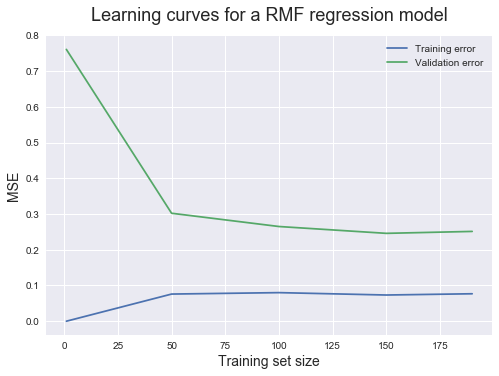

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RMF regression model', fontsize = 18, y = 1.03)
plt.legend()


In [0]:
X=np.array(X_train)
Y=np.array(Y_train)

In [0]:
import numpy as np
Z = np.c_[X.reshape(len(X), -1), Y.reshape(len(Y), -1)]
X2 = Z[:, :X.size // len(X)].reshape(X.shape);
Y2 = Z[:, X.size // len(X):].reshape(Y.shape);

In [0]:
X_train=X2
Y_train=Y2

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.04       -0.04       -0.04       -0.04      ]
 [-0.03       -0.07       -0.07       -0.07       -0.07      ]
 [-0.03333333 -0.06       -0.06       -0.06       -0.06      ]
 [-0.03157895 -0.05263158 -0.06315789 -0.06315789 -0.06315789]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.76027397 -0.76027397 -0.76027397 -0.76027397 -0.76388889]
 [-0.30821918 -0.32191781 -0.30821918 -0.31506849 -0.30555556]
 [-0.26712329 -0.24657534 -0.28767123 -0.28767123 -0.24305556]
 [-0.25342466 -0.23972603 -0.24657534 -0.21917808 -0.27777778]
 [-0.28767123 -0.23972603 -0.25342466 -0.23972603 -0.28472222]]


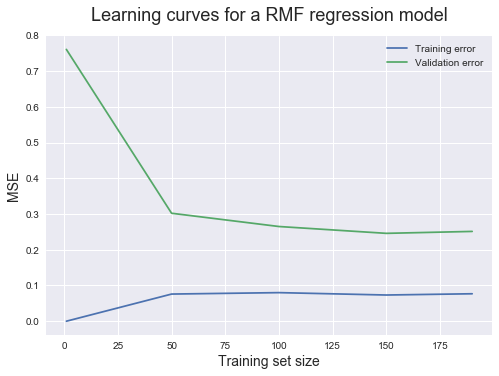

In [0]:
#XGB
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = ExtraTreesClassifier(), X = X_train,
                                                   y = Y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RMF regression model', fontsize = 18, y = 1.03)
plt.legend()


In [0]:
#XGB
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = clf, X = X_train,
                                                   y = Y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RMF regression model', fontsize = 18, y = 1.03)
plt.legend()


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x7f0662c10710>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [0]:
df.head()

In [0]:
import numpy as np
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,MaxPooling2D
import pandas as pd
from keras.layers.normalization import BatchNormalization

from keras.callbacks import EarlyStopping
early_spotting_monitor = EarlyStopping(patience=2)
from keras.layers import Input, Dense
from keras.models import Model       
from keras.layers.merge import concatenate

def baseline_model():
    model = Sequential()
    model.add(BatchNormalization())
    model.add(Dense(128, input_dim=4, init='uniform', activation='relu'))
    model.add(Dense(64, input_dim=4, init='uniform', activation='softplus'))  
    model.add(Dense(32, input_dim=4, init='uniform', activation='selu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    # Compile model     #logarithmic  loss     #method
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

def create_baseline():
    # create modelrelu
    model = Sequential()
    model.add(Dense(256, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

# data reading
df = pd.read_csv('data.csv')
df.columns = ['Months since Last Donation', 'Number of Donations', 'Total Volume Donated (c.c.)','Months since First Donation', 'Made Donation in March 2007']

# new feature
Ratio = df['Months since First Donation']/df['Number of Donations']
Ratio1 = df['Months since Last Donation']/df['Months since First Donation']
df['Ratio'] = Ratio

# axis=0, with_mean=True, with_std=True, copy=True

#df['Ratio1'] = Ratio1
#df = df.drop(['Unnamed: 0'], 1)
#df = df.drop(['Months since Last Donation'], 1)



# useless feature
df = df.drop(['Total Volume Donated (c.c.)'], 1)

# data for model
X = np.array(df.drop(['Made Donation in March 2007'], 1))
y = np.array(df['Made Donation in March 2007'])
# data scaling
X = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)


# Fit the model
clf = create_baseline()
clf.fit(X, y, nb_epoch=500, batch_size=10)
#clf.fit(X,y,validation_split=0.10,epochs=25,callbacks=[early_spotting_monitor])  # starts training


# evaluate the model
testdf = pd.read_csv('test.csv')
testdf.columns = ['Id', 'Months since Last Donation', 'Number of Donations','Total Volume Donated (c.c.)', 'Months since First Donation']

testdf['Ratio'] = testdf['Months since First Donation']/testdf['Number of Donations']


#testdf['Ratio1'] =  testdf['Months since Last Donation']/testdf['Months since First Donation']

testdf = testdf.drop(['Total Volume Donated (c.c.)'], 1)
Xtest = preprocessing.scale(np.array(testdf.drop(['Id'], 1)))

#testdf = testdf.drop(['Months since Last Donation'], 1)
Id = testdf['Id'].tolist()
predicted = [i[0] for i in clf.predict_proba(Xtest)]
pd.DataFrame({'': Id,
              'Made Donation in March 2007': predicted})\
    .to_csv("resultNNrohit.csv", sep=',', index=False)


/home/vvk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/500
748/748 [==============================] - 1s 1ms/step - loss: 0.5183 - acc: 0.7553
Epoch 2/500
748/748 [==============================] - 1s 686us/step - loss: 0.4735 - acc: 0.7807
Epoch 3/500
748/748 [==============================] - 0s 632us/step - loss: 0.4747 - acc: 0.7955
Epoch 4/500
748/748 [==============================] - 0s 643us/step - loss: 0.4691 - acc: 0.8048
Epoch 5/500
748/748 [==============================] - 0s 643us/step - loss: 0.4679 - acc: 0.7901
Epoch 6/500
748/748 [==============================] - 0s 661us/step - loss: 0.4675 - acc: 0.7981
Epoch 7/500
748/748 [==============================] - 0s 620us/step - loss: 0.4606 - acc: 0.7955
Epoch 8/500
748/748 [==============================] - 0s 633us/step - loss: 0.4637 - acc: 0.8035
Epoch 9/500
748/748 [==============================] - 0s 618us/step - loss: 0.4661 - acc: 0.7928
Epoch 10/500
748/748 [==============================] - 0s 663us/step - loss: 0.4639 - acc: 0.7995
Epoch 11/500
748/748 

748/748 [==============================] - 0s 612us/step - loss: 0.4409 - acc: 0.8128
Epoch 84/500
748/748 [==============================] - 0s 574us/step - loss: 0.4420 - acc: 0.8102
Epoch 85/500
748/748 [==============================] - 0s 579us/step - loss: 0.4433 - acc: 0.8102
Epoch 86/500
748/748 [==============================] - 0s 571us/step - loss: 0.4434 - acc: 0.8102
Epoch 87/500
748/748 [==============================] - 0s 577us/step - loss: 0.4418 - acc: 0.8115
Epoch 88/500
748/748 [==============================] - 0s 579us/step - loss: 0.4406 - acc: 0.8075
Epoch 89/500
748/748 [==============================] - 0s 589us/step - loss: 0.4421 - acc: 0.8088
Epoch 90/500
748/748 [==============================] - 0s 562us/step - loss: 0.4390 - acc: 0.8088
Epoch 91/500
748/748 [==============================] - 0s 585us/step - loss: 0.4393 - acc: 0.8115
Epoch 92/500
748/748 [==============================] - 0s 564us/step - loss: 0.4478 - acc: 0.8102
Epoch 93/500
748/748 [=

748/748 [==============================] - 0s 586us/step - loss: 0.4262 - acc: 0.8142
Epoch 166/500
748/748 [==============================] - 0s 593us/step - loss: 0.4266 - acc: 0.8088
Epoch 167/500
748/748 [==============================] - 0s 567us/step - loss: 0.4251 - acc: 0.8168
Epoch 168/500
748/748 [==============================] - 0s 585us/step - loss: 0.4289 - acc: 0.8115
Epoch 169/500
748/748 [==============================] - 0s 569us/step - loss: 0.4235 - acc: 0.8048
Epoch 170/500
748/748 [==============================] - 0s 577us/step - loss: 0.4252 - acc: 0.8061
Epoch 171/500
748/748 [==============================] - 0s 588us/step - loss: 0.4298 - acc: 0.8075
Epoch 172/500
748/748 [==============================] - 0s 560us/step - loss: 0.4255 - acc: 0.8115
Epoch 173/500
748/748 [==============================] - 0s 613us/step - loss: 0.4265 - acc: 0.8142
Epoch 174/500
748/748 [==============================] - 0s 595us/step - loss: 0.4284 - acc: 0.8182
Epoch 175/500


748/748 [==============================] - 0s 594us/step - loss: 0.4129 - acc: 0.8235
Epoch 248/500
748/748 [==============================] - 0s 570us/step - loss: 0.4006 - acc: 0.8262
Epoch 249/500
748/748 [==============================] - 0s 572us/step - loss: 0.4034 - acc: 0.8235
Epoch 250/500
748/748 [==============================] - 0s 588us/step - loss: 0.4022 - acc: 0.8235
Epoch 251/500
748/748 [==============================] - 0s 582us/step - loss: 0.4050 - acc: 0.8262
Epoch 252/500
748/748 [==============================] - 0s 580us/step - loss: 0.4009 - acc: 0.8222
Epoch 253/500
748/748 [==============================] - 0s 579us/step - loss: 0.3913 - acc: 0.8262
Epoch 254/500
748/748 [==============================] - 0s 567us/step - loss: 0.4054 - acc: 0.8302
Epoch 255/500
748/748 [==============================] - 0s 602us/step - loss: 0.3960 - acc: 0.8249
Epoch 256/500
748/748 [==============================] - 0s 575us/step - loss: 0.3970 - acc: 0.8289
Epoch 257/500


748/748 [==============================] - 0s 572us/step - loss: 0.3655 - acc: 0.8436
Epoch 330/500
748/748 [==============================] - 0s 576us/step - loss: 0.3761 - acc: 0.8409
Epoch 331/500
748/748 [==============================] - 0s 579us/step - loss: 0.3649 - acc: 0.8503
Epoch 332/500
748/748 [==============================] - 0s 582us/step - loss: 0.3706 - acc: 0.8369
Epoch 333/500
748/748 [==============================] - 0s 573us/step - loss: 0.3765 - acc: 0.8356
Epoch 334/500
748/748 [==============================] - 0s 577us/step - loss: 0.3673 - acc: 0.8369
Epoch 335/500
748/748 [==============================] - 0s 593us/step - loss: 0.3645 - acc: 0.8382
Epoch 336/500
748/748 [==============================] - 0s 585us/step - loss: 0.3692 - acc: 0.8489
Epoch 337/500
748/748 [==============================] - 0s 578us/step - loss: 0.3662 - acc: 0.8449
Epoch 338/500
748/748 [==============================] - 0s 585us/step - loss: 0.3676 - acc: 0.8302
Epoch 339/500


748/748 [==============================] - 0s 607us/step - loss: 0.3351 - acc: 0.8663
Epoch 412/500
748/748 [==============================] - 0s 574us/step - loss: 0.3410 - acc: 0.8583
Epoch 413/500
748/748 [==============================] - 0s 581us/step - loss: 0.3433 - acc: 0.8676
Epoch 414/500
748/748 [==============================] - 0s 564us/step - loss: 0.3413 - acc: 0.8663
Epoch 415/500
748/748 [==============================] - 0s 583us/step - loss: 0.3248 - acc: 0.8676
Epoch 416/500
748/748 [==============================] - 0s 570us/step - loss: 0.3433 - acc: 0.8556
Epoch 417/500
748/748 [==============================] - 0s 571us/step - loss: 0.3232 - acc: 0.8650
Epoch 418/500
748/748 [==============================] - 0s 578us/step - loss: 0.3400 - acc: 0.8610
Epoch 419/500
748/748 [==============================] - 0s 601us/step - loss: 0.3339 - acc: 0.8570
Epoch 420/500
748/748 [==============================] - 0s 562us/step - loss: 0.3328 - acc: 0.8623
Epoch 421/500


748/748 [==============================] - 1s 684us/step - loss: 0.3267 - acc: 0.8650
Epoch 494/500
748/748 [==============================] - 1s 824us/step - loss: 0.3116 - acc: 0.8783
Epoch 495/500
748/748 [==============================] - 0s 626us/step - loss: 0.3189 - acc: 0.8810
Epoch 496/500
748/748 [==============================] - 0s 578us/step - loss: 0.3386 - acc: 0.8783
Epoch 497/500
748/748 [==============================] - 0s 491us/step - loss: 0.3581 - acc: 0.8489
Epoch 498/500
748/748 [==============================] - 1s 713us/step - loss: 0.3458 - acc: 0.8743
Epoch 499/500
748/748 [==============================] - 0s 571us/step - loss: 0.3394 - acc: 0.8676
Epoch 500/500
748/748 [==============================] - 0s 574us/step - loss: 0.3380 - acc: 0.8703


In [0]:
scores = clf.evaluate(X, y)
print("\n%s: %.2f%%" % (clf.metrics_names[1], scores[1]*100))


748/748 [==============================] - 0s 167us/step

acc: 85.43%


In [0]:
scores = clf.evaluate(X, y)
print("\n%s: %.2f%%" % (clf.metrics_names[1], scores[1]*100))

748/748 [==============================] - 0s 64us/step

acc: 87.97%


axomafad-6143@yopmail.com
ommommimis-5824@yopmail.com

<h1>References

https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/
https://stackoverflow.com/
https://pandas.pydata.org/pandas-docs/stable/tutorials.html
https://matplotlib.org/users/pyplot_tutorial.html

http://matthewalanham.com/Students/2017_MWDSI_Deepti.pdf
http://thescipub.com/pdf/10.3844/jcssp.2010.548.552
